In [8]:
import pandas as pd
import numpy as np

brm_df = pd.read_csv('BRM.csv')
AoA_df = pd.read_csv('AoA.csv')
babiness_df = pd.read_csv('babiness.csv')
esm_df = pd.read_excel('ESM.xlsx')

In [2]:
merged_df = pd.read_csv('processed_files/merged_with_iconicity.csv')
merged_df

,Word,Word type,new AoA,Frequency,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,pos_new,icon_eng,freq_eng,Bigram,Conc.M,Conc.SD,Unknown,Total,SUBTLEX
0,able,A,309.0,2.5170,6.64,1.79,22.0,3.38,2.25,21.0,adjective,0.466667,5.44,0.0,2.38,1.42,1.0,27.0,8155.0
1,add,V,225.0,2.3694,6.23,1.77,22.0,4.00,2.38,20.0,verb,-0.153846,5.07,0.0,3.00,1.51,0.0,30.0,1686.0
2,afraid,A,246.0,2.0508,2.25,1.16,20.0,5.12,2.57,42.0,adjective,1.333333,4.73,0.0,2.70,1.39,0.0,30.0,12631.0
3,aim,N,357.0,1.7326,5.95,1.76,22.0,4.00,2.37,21.0,verb,0.454545,4.53,0.0,3.27,1.23,0.0,30.0,758.0
4,air,N,233.0,2.4006,6.71,1.85,21.0,3.25,2.55,20.0,noun,1.300000,5.37,0.0,4.11,1.22,0.0,27.0,7090.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,yawn,V,284.0,0.8775,5.62,1.63,21.0,2.84,1.93,25.0,verb,3.384615,3.06,0.0,4.46,0.84,0.0,28.0,51.0
716,yellow,N,256.0,1.0935,6.09,1.82,43.0,3.83,2.33,41.0,adjective,0.500000,4.66,0.0,4.30,1.06,0.0,30.0,1724.0
717,yodel,V,473.0,-0.9586,6.10,2.21,21.0,3.33,2.15,21.0,noun,2.900000,2.26,0.0,4.20,1.10,0.0,30.0,43.0
718,young,A,286.0,2.6892,6.31,1.59,39.0,4.09,2.22,22.0,adjective,0.333333,5.44,0.0,3.16,1.46,0.0,25.0,12402.0


In [3]:
words = merged_df['Word'].values.tolist()
frequencies = merged_df['Frequency'].values.tolist()
AoA = merged_df['new AoA'].values.tolist()
valence = merged_df['V.Mean.Sum'].values.tolist()
arousal = merged_df['A.Mean.Sum'].values.tolist()
concreteness = merged_df['Conc.M'].values.tolist()
iconicity = merged_df['icon_eng'].values.tolist()


In [4]:


z_frequencies = stats.zscore(frequencies)
z_valence = stats.zscore(valence)
z_arousal = stats.zscore(arousal)
z_concreteness = stats.zscore(concreteness)
z_iconicity = stats.zscore(iconicity)

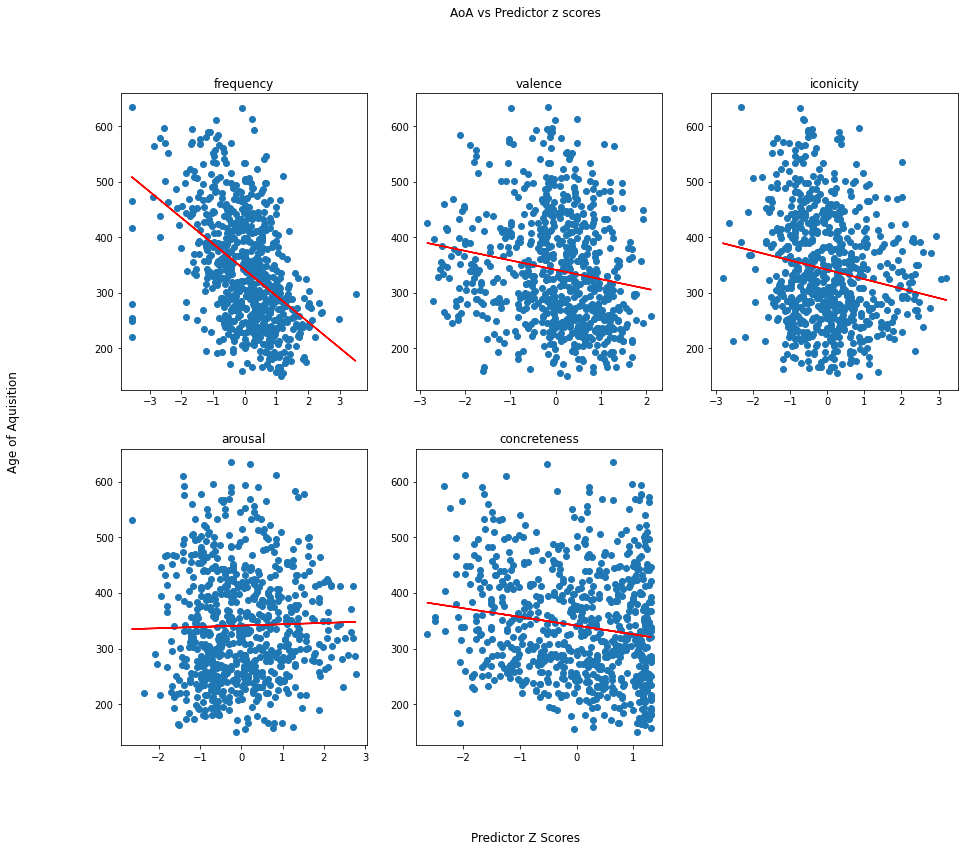

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle('AoA vs Predictor z scores')
axs[0,0].scatter(z_frequencies, AoA)
axs[0,0].set_title("frequency")
a, b = np.polyfit(z_frequencies, AoA, 1)
axs[0,0].plot(z_frequencies, a*z_frequencies+b, 'r')

axs[0,1].scatter(z_valence, AoA)
axs[0,1].set_title("valence")
a, b = np.polyfit(z_valence, AoA, 1)
axs[0,1].plot(z_valence, a*z_valence+b, 'r')

axs[1,0].scatter(z_arousal, AoA)
axs[1,0].set_title("arousal")
a, b = np.polyfit(z_arousal, AoA, 1)
axs[1,0].plot(z_arousal, a*z_arousal+b, 'r')

axs[1,1].scatter(z_concreteness, AoA)
axs[1,1].set_title("concreteness")
a, b = np.polyfit(z_concreteness, AoA, 1)
axs[1,1].plot(z_concreteness, a*z_concreteness+b, 'r')

axs[0,2].scatter(z_iconicity, AoA)
axs[0,2].set_title("iconicity")
a, b = np.polyfit(z_iconicity, AoA, 1)
axs[0,2].plot(z_iconicity, a*z_iconicity+b, 'r')

fig.supxlabel("Predictor Z Scores")
fig.supylabel("Age of Aquisition")
fig.delaxes(axs[1,2])


In [10]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
data = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)
data


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [25]:
data = {}
lst = []

for i in range(len(AoA)):
    temp = []
    temp.append(valence[i])
    temp.append(arousal[i])
    temp.append(concreteness[i])
    temp.append(iconicity[i])
    lst.append(temp)

data['data'] = lst
data['target'] = AoA
     

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data['data'], data['target'])


In [30]:
#Linear Regression

ols = linear_model.LinearRegression()
ols.fit(x_train, y_train)
ols_pred = ols.predict(x_test)

ols_score = metrics.mean_squared_error(y_test, ols_pred)
print("Coef:\n", ols.coef_.round(2), '\n')
print('score (MSE):', ols_score)

Coef:
 [-14.68  -4.54 -15.29 -18.32] 

score (MSE): 9550.77361519873


In [31]:
#Bayesian Ridge

byr = linear_model.BayesianRidge()
byr.fit(x_train, y_train)
byr_pred = byr.predict(x_test)

byr_score = metrics.mean_squared_error(y_test, byr_pred)
print("Coef:\n", byr.coef_.round(2), '\n')
print('score (MSE):', byr_score)

Coef:
 [-13.82  -3.89 -14.02 -16.86] 

score (MSE): 9505.712030898261


In [35]:
#Automatic Relevance Determination

ard = linear_model.ARDRegression()
ard.fit(x_train, y_train)
ard_pred = ard.predict(x_test)

ard_score = metrics.mean_squared_error(y_test, ard_pred)
print("Coef:\n", ard.coef_.round(2), '\n')
print('score (MSE):', ard_score)

Coef:
 [-13.23  -0.   -13.66 -17.94] 

score (MSE): 9449.222077333943


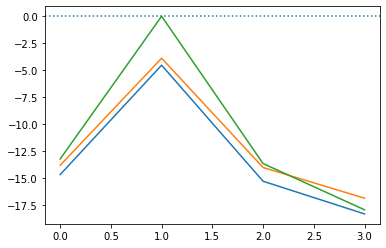

In [33]:
plt.plot(range(len(ols.coef_)), ols.coef_)
plt.plot(range(len(byr.coef_)), byr.coef_)
plt.plot(range(len(ard.coef_)), ard.coef_)

plt.axhline(0, linestyle='dotted')